# German Credit Data Set

https://www.openml.org/search?type=data&sort=runs&status=active&id=31

## Data Dictionary

| Column Name              | Non-Null Count | Dtype   |
|--------------------------|----------------|---------|
| checking_status          | 1000 non-null  |  object |
| duration                 | 1000 non-null  |  float64|
| credit_history           | 1000 non-null  |  object |
| purpose                  | 1000 non-null  |  object |
| credit_amount            | 1000 non-null  |  float64|
| savings_status           | 1000 non-null  |  object |
| employment               | 1000 non-null  |  object |
| installment_commitment   | 1000 non-null  |  float64|
| personal_status          | 1000 non-null  |  object |
| other_parties            | 1000 non-null  |  object |
| residence_since          | 1000 non-null  |  float64|
| property_magnitude       | 1000 non-null  |  object |
| age                      | 1000 non-null  |  float64|
| other_payment_plans      | 1000 non-null  |  object |
| housing                  | 1000 non-null  |  object |
| existing_credits         | 1000 non-null  |  float64|
| job                      | 1000 non-null  |  object |
| num_dependents           | 1000 non-null  |  float64|
| own_telephone            | 1000 non-null  |  object |
| foreign_worker           | 1000 non-null  |  object |
| class                    | 1000 non-null  |  object |

The column `class` is the target variable.

## Exploratory Data Analysis

In [1]:
import pandas as pd 
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [2]:
# Environmental variables
DATA_PATH = "./data/dataset_31_credit-g.arff"
PLOT_PATH = "./plots/"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read data file
try:
    # Replace 'your_data.arff' with your file path
    arff_file_data, meta = arff.loadarff(DATA_PATH)
    df = pd.DataFrame(arff_file_data)

    # Decode byte strings to regular strings
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.decode('utf-8')
            except AttributeError:
                pass

except ImportError:
    raise ImportError("scipy is required to read .arff files. Please install scipy and try again.") 

finally:
    print(f"Data loaded successfully. \nDataFrame shape: {df.shape[0]:,} rows and {df.shape[1]:,} columns.")

Data loaded successfully. 
DataFrame shape: 1,000 rows and 21 columns.


In [5]:
# Peek at data
display(df.head(10))

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,4.0,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes,good
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,4.0,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes,good
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,2.0,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,4.0,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes,good
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,2.0,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes,bad


In [6]:
print(meta)

Dataset: german_credit
	checking_status's type is nominal, range is ('<0', '0<=X<200', '>=200', 'no checking')
	duration's type is numeric
	credit_history's type is nominal, range is ('no credits/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/other existing credit')
	purpose's type is nominal, range is ('new car', 'used car', 'furniture/equipment', 'radio/tv', 'domestic appliance', 'repairs', 'education', 'vacation', 'retraining', 'business', 'other')
	credit_amount's type is numeric
	savings_status's type is nominal, range is ('<100', '100<=X<500', '500<=X<1000', '>=1000', 'no known savings')
	employment's type is nominal, range is ('unemployed', '<1', '1<=X<4', '4<=X<7', '>=7')
	installment_commitment's type is numeric
	personal_status's type is nominal, range is ('male div/sep', 'female div/dep/mar', 'male single', 'male mar/wid', 'female single')
	other_parties's type is nominal, range is ('none', 'co applicant', 'guarantor')
	residence_since's type is nume

In [7]:
# Checking dataset types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [8]:
# Checking for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [9]:
# Identify columns with missing data
missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

if missing_counts.sum() > 0:
    # When there are missing values

    # Filter columns with missing values
    missing_columns = missing_counts[missing_counts > 0].index.tolist()

    # Display columns with missing values, their count, and percentage
    print("Columns with missing data:\n")
    for col in missing_columns:
        print(f"{col:<15} : {missing_counts[col]:>6,} missing ({missing_percent[col]:>5.2f}%)")
else:
    # When there are no missing values
    print('There are no missing values in the dataset.')

There are no missing values in the dataset.


In [10]:
# Checking statistical summary of numerical columns
display(df.describe(include=[np.number]))

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
# Checking categorical columns summary
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
display(df[categorical_cols].describe())

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


In [12]:
# Get list of object-type columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()

# Iterate through each object column and display value counts
for col in object_cols:
    print(f"--- Value counts for: {col} ---")
    print(df[col].value_counts())
    print()

--- Value counts for: checking_status ---
checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64

--- Value counts for: credit_history ---
credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64

--- Value counts for: purpose ---
purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64

--- Value counts for: savings_status ---
savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: count, dtype: int64

--- Value counts for: em

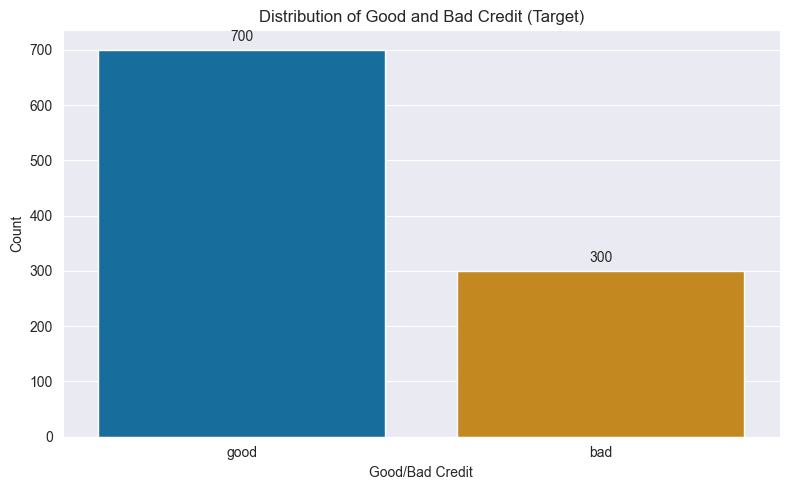

In [13]:
# Analysis of target column distribution
target_column = 'class'

### Checking target `label` column  # Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Bar chart for price category with annotations
plt.figure(figsize=(8, 5))
count_plot = sns.countplot(x=target_column, data=df, hue=target_column, palette='colorblind', legend=False)
plt.title('Distribution of Good and Bad Credit (Target)')
plt.xlabel('Good/Bad Credit')
plt.ylabel('Count')
# plt.xticks(rotation=45)

# Annotate the bars with the frequency count
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), ',.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 9),
                        textcoords = 'offset points')
plt.tight_layout()
plt.savefig(PLOT_PATH + 'barchart_label.png')
plt.show()

The target variable `class` has two categories: 'good' and 'bad' credit risk. The dataset is balanced with 700 instances of 'good' credit risk and 300 instances of 'bad' credit risk.

## Univariate Analysis

In [14]:
# Separate numerical and categorical columns into 2 lists
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [15]:
print(numerical_cols)
print(f'Number of numerical columns: {len(numerical_cols)}')

['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
Number of numerical columns: 7


In [16]:
categorical_cols.pop()  # Remove target column from categorical columns list
print(categorical_cols)
print(f'Number of categorical columns: {len(categorical_cols)}')

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
Number of categorical columns: 13


### Bar Plots for Numerical Features

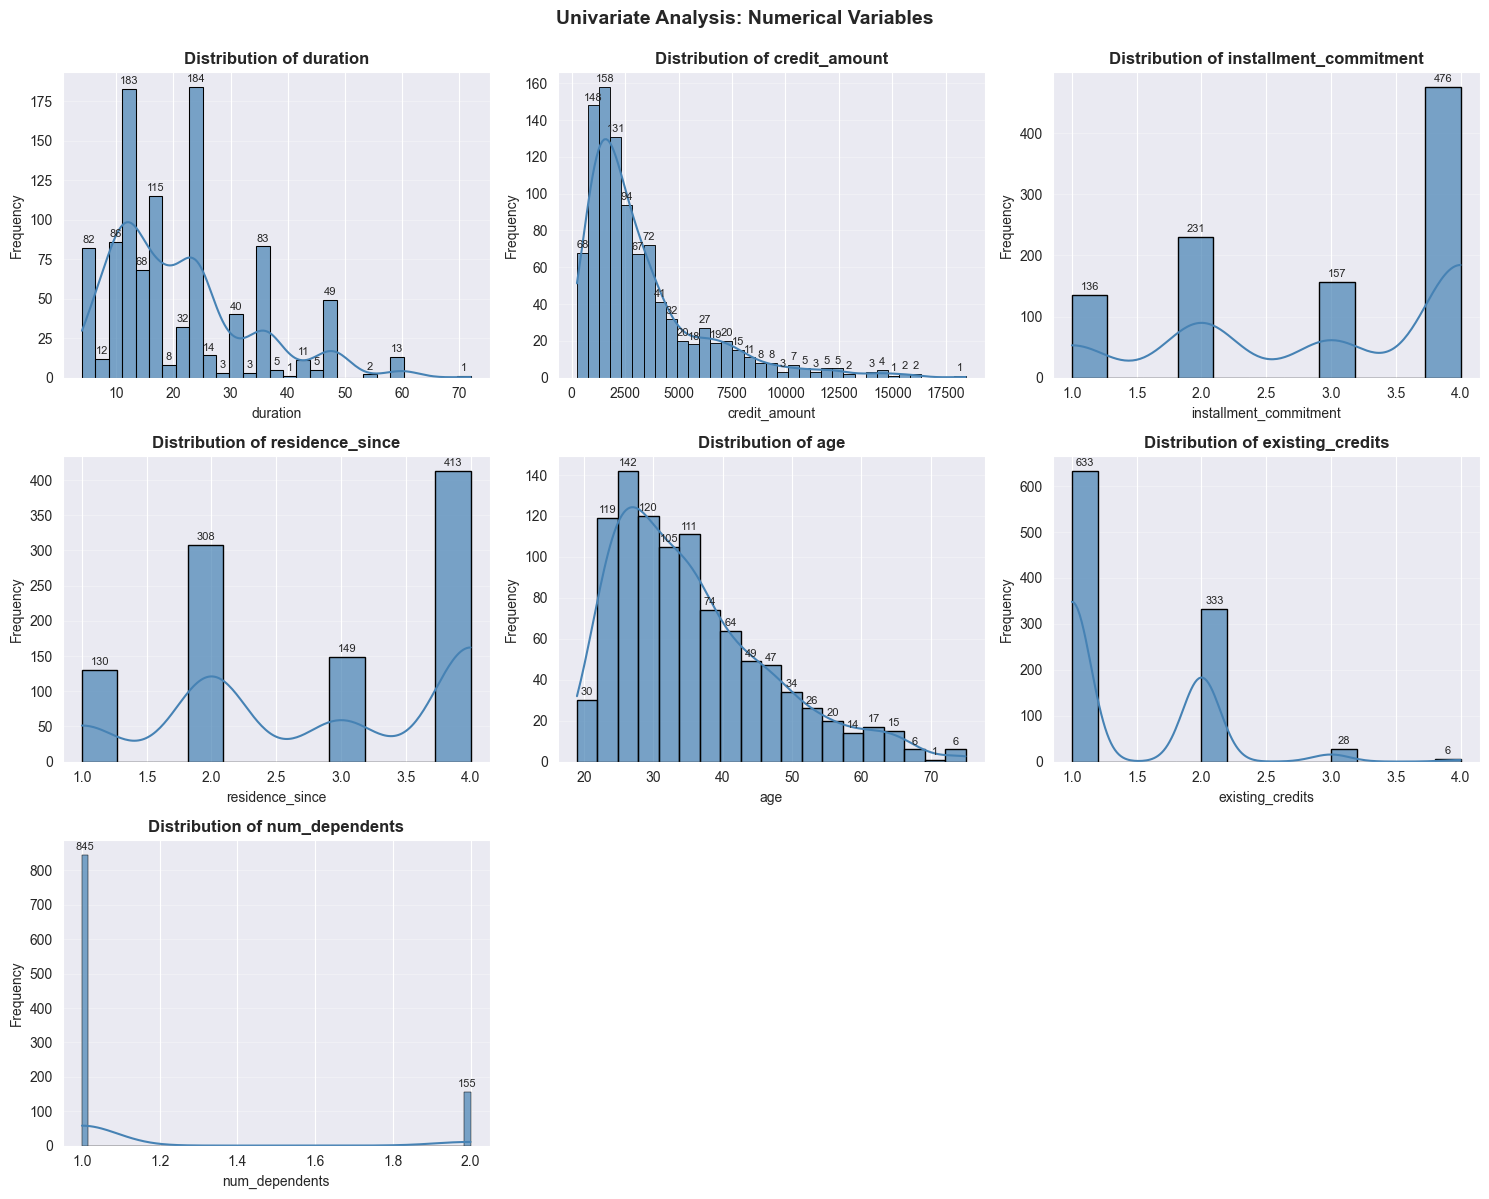

In [17]:
# Create histograms with KDE for all numerical columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Create histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    
    # Annotate bars with frequency count
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only annotate bars with values
            ax.annotate(f'{int(height)}',
                       xy=(patch.get_x() + patch.get_width() / 2, height),
                       ha='center', va='bottom',
                       fontsize=8,
                       xytext=(0, 2),
                       textcoords='offset points')
    
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

# Remove extra empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Univariate Analysis: Numerical Variables', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(PLOT_PATH + 'histograms_numerical.png', dpi=300, bbox_inches='tight')
plt.show()

**Analysis of Numerical Features:**

- `duration` - Most credit durations were between 12-24 months. A small number of credits had durations longer than 48 months, even with a maximum of 72 months.
- `credit_amount` - Right-skewed distribution, with most credits under Deutsche Mark 5,000.
- `installment_commitment` - Most creditors committed to 4 installments, but there were peaks at 2 and 3 as well.
- `residence_since` - Most of the applicants have lived at their residence for 4 years.
- `age` - Distribution peaks around 25-35 years old
- `existing_credits` - Most people have 1 existing credit with the bank. There are a few with 2 or more.
- `num_dependents` - Vast majority have 1 dependent, some have 2. It would mean that these are either young families or with limited responsibilities.


### Pie Charts for Categorical Features

In [19]:
categorical_cols

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [4]:
features_for_pie = ['checking_status', 'credit_history', 'savings_status', 'employment',
                    'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans',
                    'housing', 'job', 'own_telephone', 'foreign_worker']

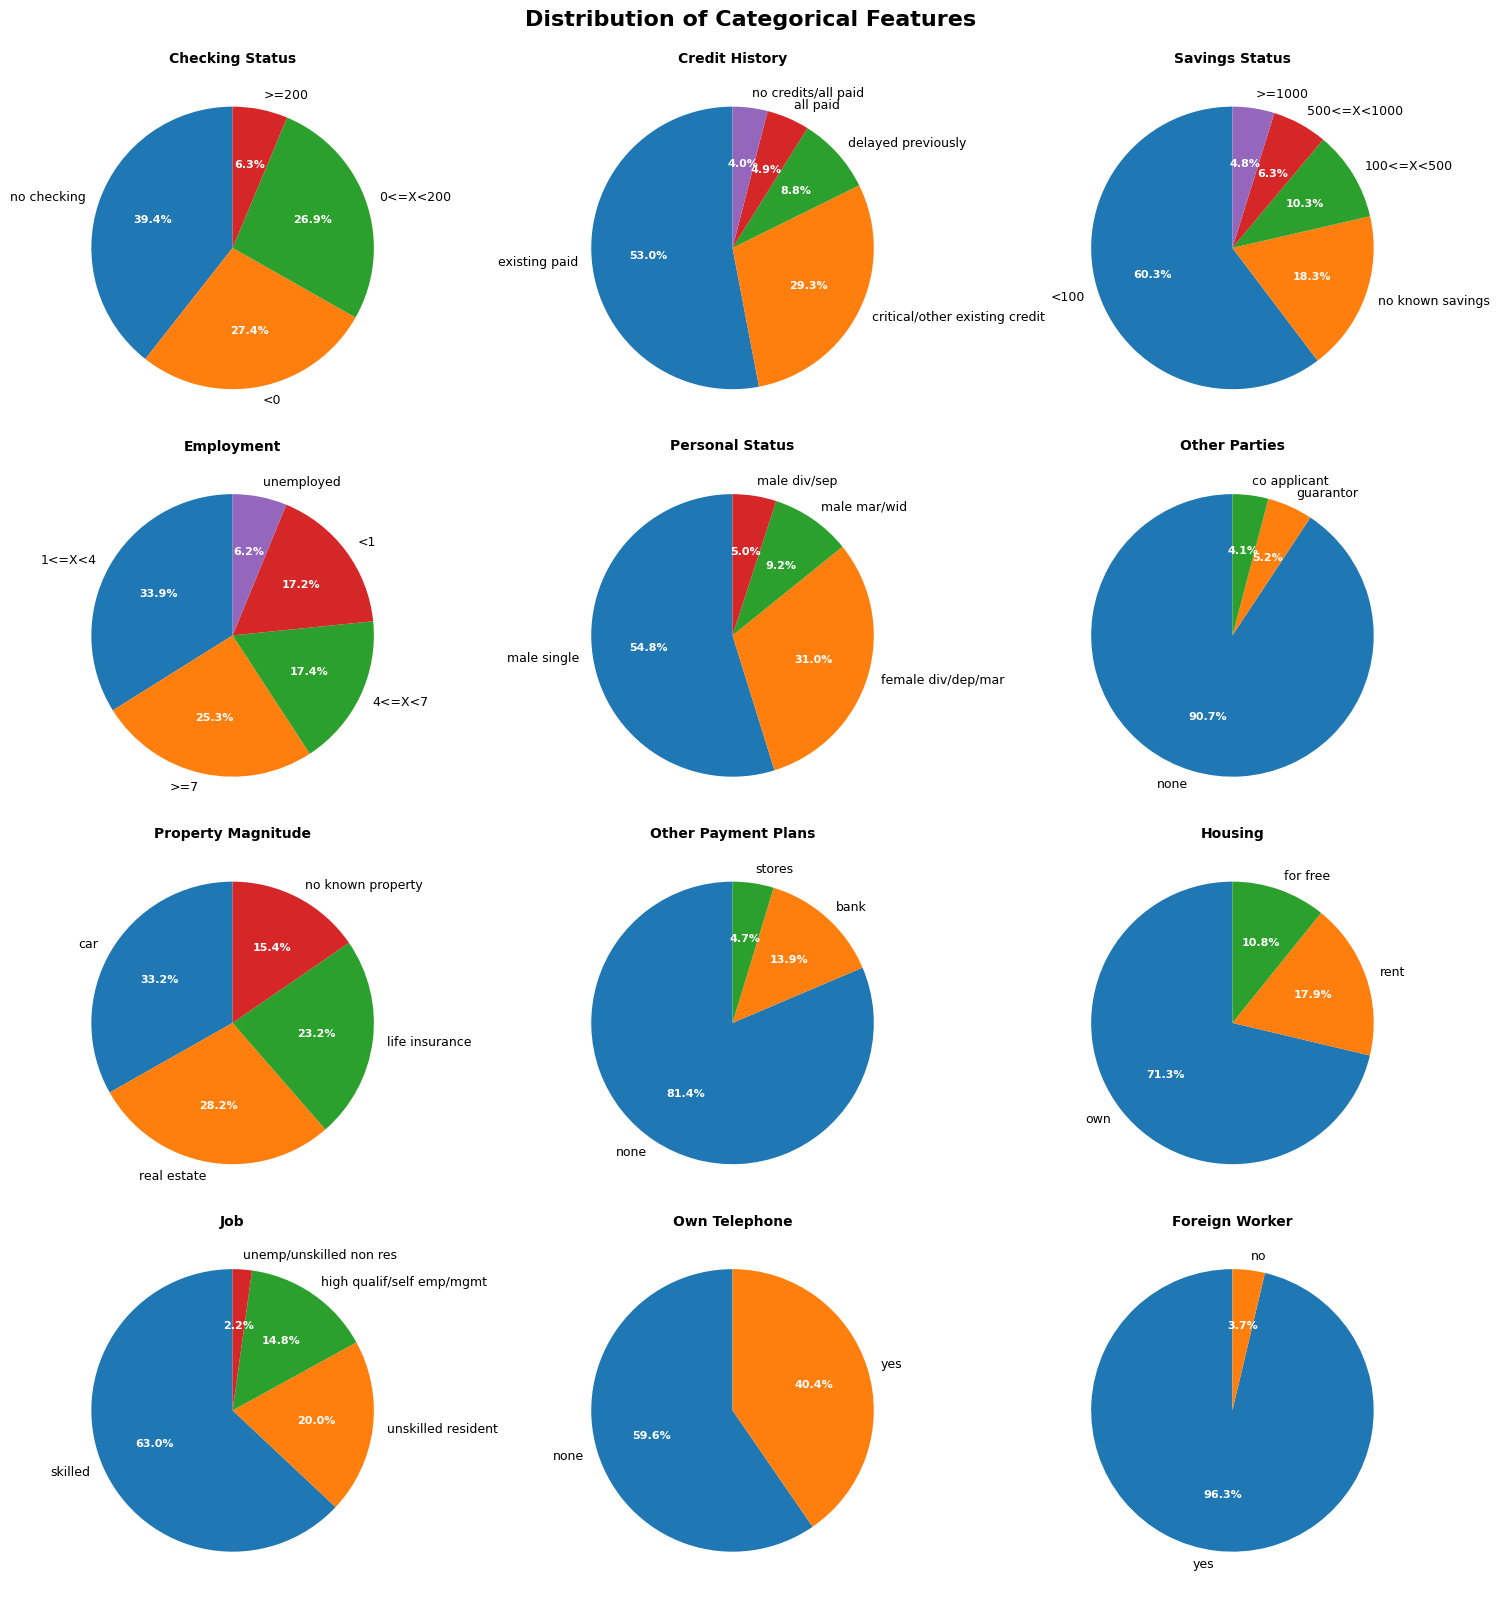

In [6]:
# Create pie charts for features in features_for_pie list
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', y=0.995)

# Flatten axes array for easier iteration
axes = axes.flatten()

for idx, feature in enumerate(features_for_pie):
    # Get value counts and sort in descending order
    value_counts = df[feature].value_counts().sort_values(ascending=False)
    
    # Create pie chart
    wedges, texts, autotexts = axes[idx].pie(
        value_counts.values, 
        labels=value_counts.index,
        autopct='%.1f%%',  # Show percentage values
        startangle=90,
        textprops={'fontsize': 9}
    )
    
    # Format the annotations to show percentages
    for autotext in autotexts:
        autotext.set_fontsize(8)
        autotext.set_fontweight('bold')
        autotext.set_color('white')
    
    # Set title for each subplot
    axes[idx].set_title(feature.replace('_', ' ').title(), fontsize=10, fontweight='bold')

plt.tight_layout()

# Save the figure
plt.savefig(f"{PLOT_PATH}categorical_features_pie_charts.png", dpi=300, bbox_inches='tight')
plt.show()

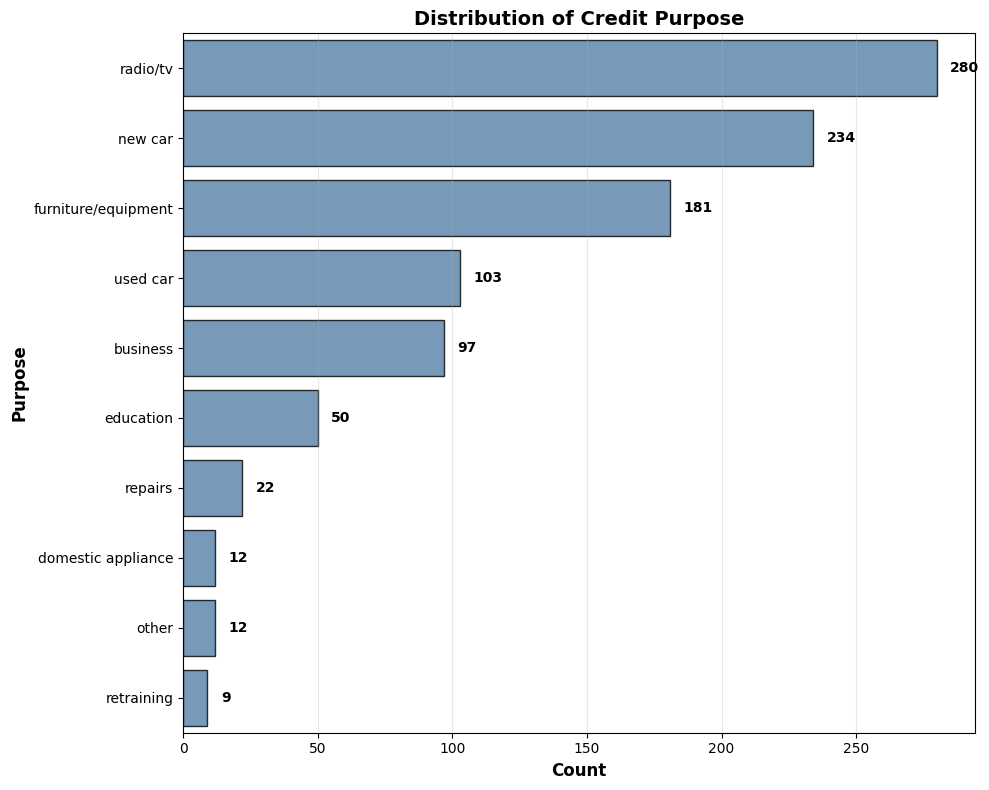

In [9]:
# Create horizontal bar chart for 'purpose' column using seaborn
plt.figure(figsize=(10, 8))

# Get value counts and sort in descending order
purpose_counts = df['purpose'].value_counts().sort_values(ascending=False)

# Create horizontal bar chart with seaborn
ax = sns.barplot(x=purpose_counts.values, y=purpose_counts.index, color='steelblue', edgecolor='black', alpha=0.8)

# Annotate bars with values
for i, value in enumerate(purpose_counts.values):
    ax.text(value + 5, i, str(value), va='center', fontweight='bold', fontsize=10)

# Set labels and title
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Purpose', fontsize=12, fontweight='bold')
plt.title('Distribution of Credit Purpose', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

# Save the figure
plt.savefig(f"{PLOT_PATH}horizontal_bar_purpose.png", dpi=300, bbox_inches='tight')
plt.show()

## Bivariate Analysis